In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os

In [3]:
df = pd.read_excel("C:\\Users\\Salman Ramzan\\Downloads\\archive\\Superstore_USA.xlsx")

In [4]:
df.shape

(9426, 24)

In [5]:
df.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [6]:
#df.info()

In [7]:
df['Order Date'].dt.year

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Date, Length: 9426, dtype: int32

In [8]:
df['Order Year']= df['Order Date'].dt.year

In [9]:
#df.isnull()

In [10]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
Order Year               0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Order Year              0
dtype: int64

In [13]:
df[['Unit Price','Profit','Discount']].describe()

,Unit Price,Profit,Discount
count,9354.000000,9354.000000,9354.000000
mean,87.700184,136.892329,0.049551
std,282.374198,991.928171,0.031782
min,0.990000,-16476.838000,0.000000
25%,6.480000,-73.959375,0.020000
50%,20.980000,2.477000,0.050000
75%,85.990000,138.343500,0.080000
max,6783.020000,16332.414000,0.250000


In [14]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID', 'Order Year'],
      dtype='object')

In [15]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [16]:
df['Order Priority']= df['Order Priority'].replace('Critical ','Critical')

# Order Priority

In [17]:
df['Order Priority'].value_counts()

Order Priority
High             1955
Low              1910
Not Specified    1866
Medium           1838
Critical         1785
Name: count, dtype: int64

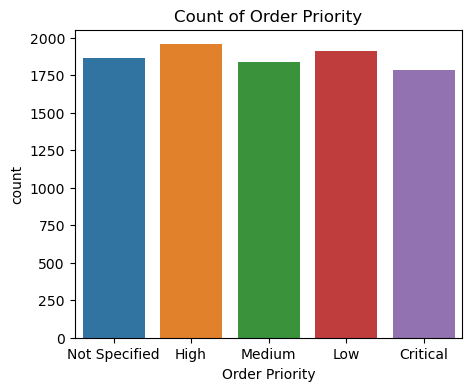

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='Order Priority', data=df)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")

# Ship Mode

In [19]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       6992
Delivery Truck    1266
Express Air       1096
Name: count, dtype: int64

In [20]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values


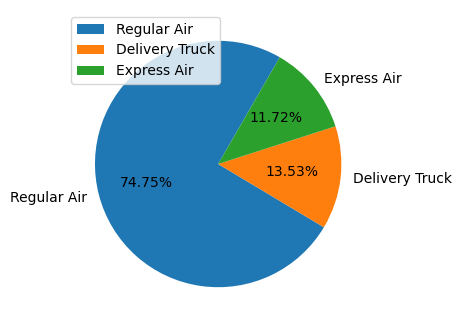

In [21]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x, startangle=60, autopct='%0.2f%%')
plt.legend(loc=2)
plt.show()



<Axes: xlabel='Ship Mode', ylabel='count'>

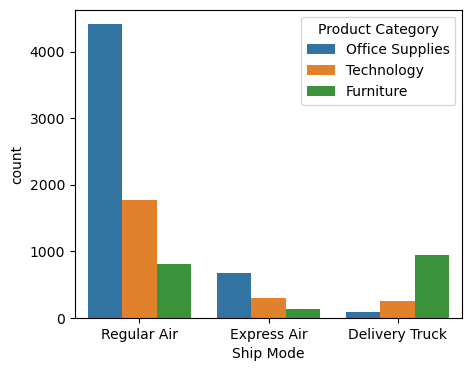

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode", data=df,hue ="Product Category")

# Customer Segment

<Axes: xlabel='Customer Segment', ylabel='count'>

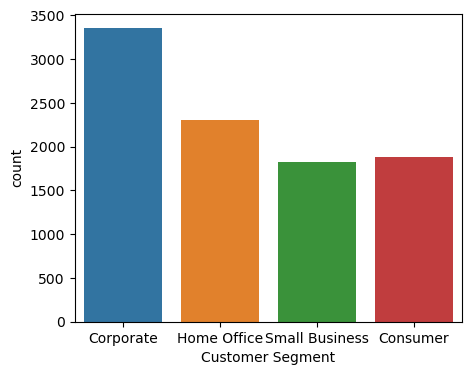

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(x="Customer Segment", data=df)

# Product Category

<Axes: xlabel='Product Category', ylabel='count'>

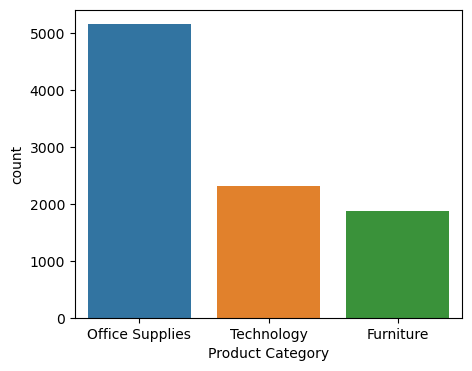

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category", data=df)

# Product Sub-Category

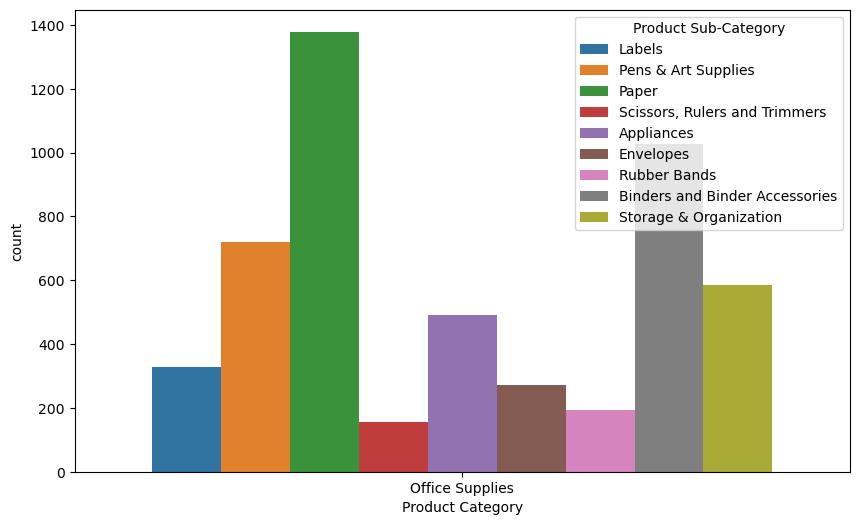

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data=df[df["Product Category"]=="Office Supplies"], hue="Product Sub-Category")
plt.show()

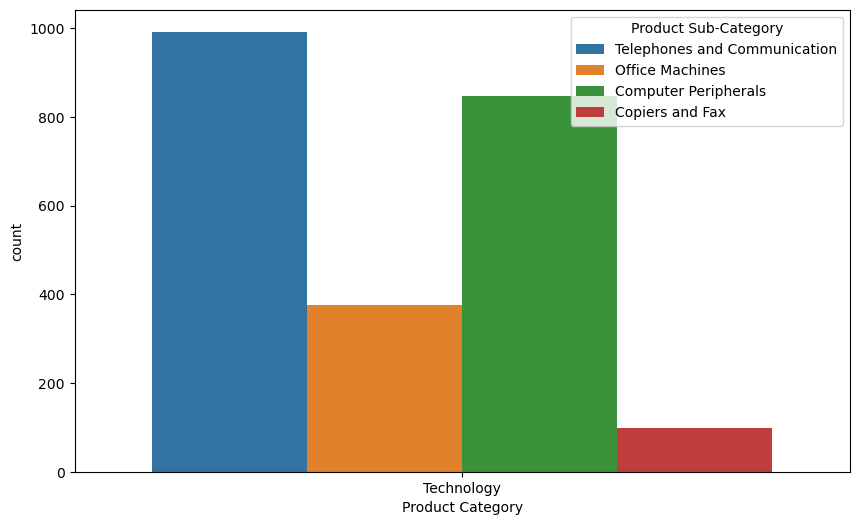

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data=df[df["Product Category"]=="Technology"], hue="Product Sub-Category")
plt.show()

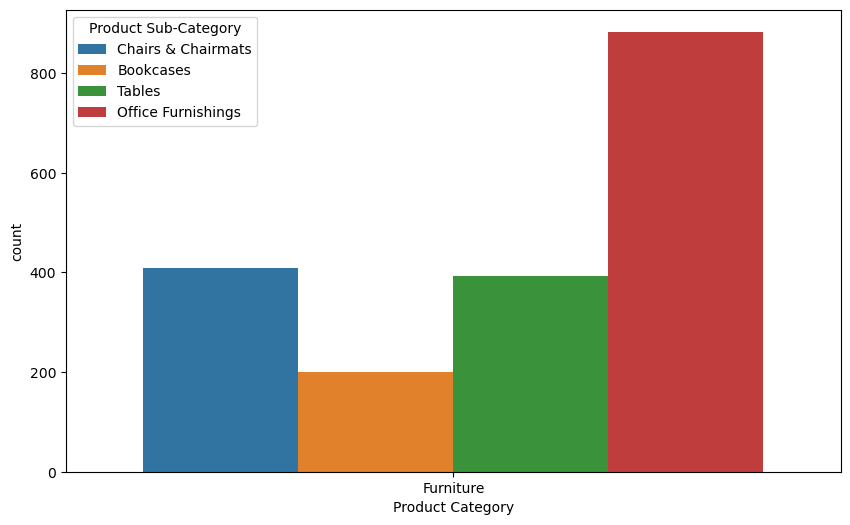

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data=df[df["Product Category"]=="Furniture"], hue="Product Sub-Category")
plt.show()

# Order Years

In [28]:
df["Order Year"].value_counts()

Order Year
2013    3038
2012    2207
2011    2173
2010    1936
Name: count, dtype: int64

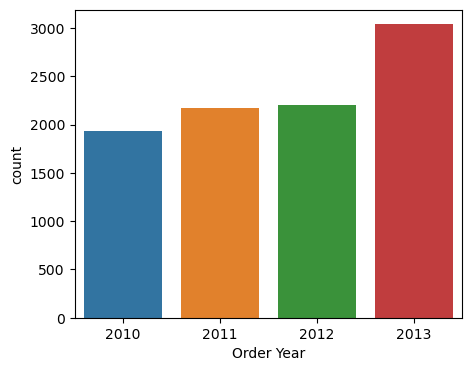

In [29]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Year", data=df)
plt.show()

# Profit

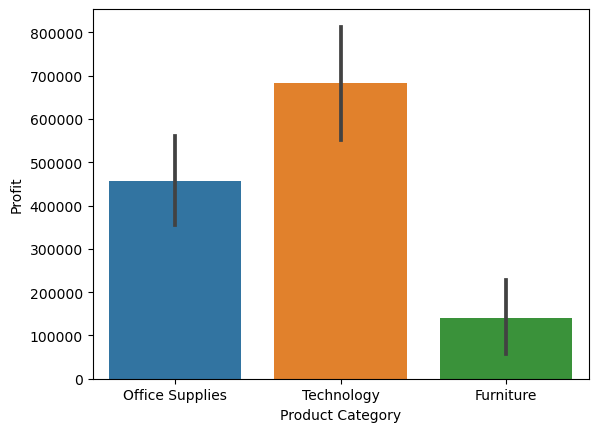

In [30]:
sns.barplot(x="Product Category",y="Profit",data=df,estimator="sum")
plt.show()

In [31]:
df['State or Province'].value_counts()[:5]

State or Province
California    1011
Texas          642
Illinois       577
New York       571
Florida        518
Name: count, dtype: int64

# Profit base Margin

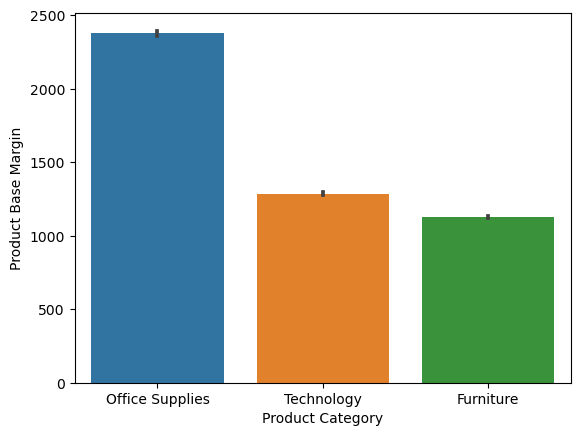

In [32]:
sns.barplot(x="Product Category",y="Product Base Margin",data=df,estimator="sum")
plt.show()